In [110]:
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import mean_absolute_error


#Loading the dataset "Finding Donors for Charity" retreived from kaggle.com
students_performance=pd.read_csv("StudentsPerformance.csv")
students_performance.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [111]:
#Trying to check the size of dataset
students_performance.shape
students_performance.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


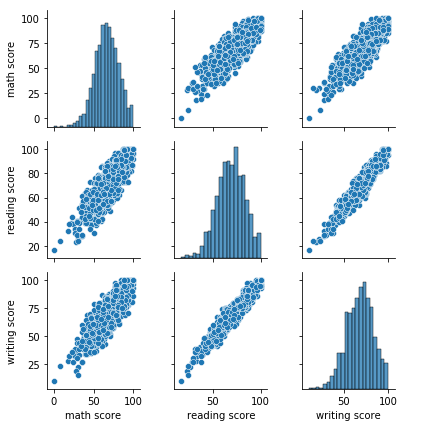

In [112]:
#getting insight on with correlation between students's performance through dataset
sns.pairplot(students_performance[['math score', 'reading score', 'writing score']], height = 2)

In [113]:
#adding columns for grade marks for each exam:

#>85 = A, >60 = B, >59 = C, >46 = D, <=45 = F

def ScoreMark(score):
    if ( score > 85 ):
        mark = 'A'
    elif ( score > 60):
        mark = 'B'
    elif ( score > 59):
        mark = 'C'
    elif ( score > 46):
        mark = 'D'
    else:
        mark = 'F'
    return mark

students_performance['math mark'] = students_performance['math score'].apply(lambda s: ScoreMark(s))
students_performance['reading mark'] = students_performance['reading score'].apply(lambda s: ScoreMark(s))
students_performance['writing mark'] = students_performance['writing score'].apply(lambda s: ScoreMark(s))


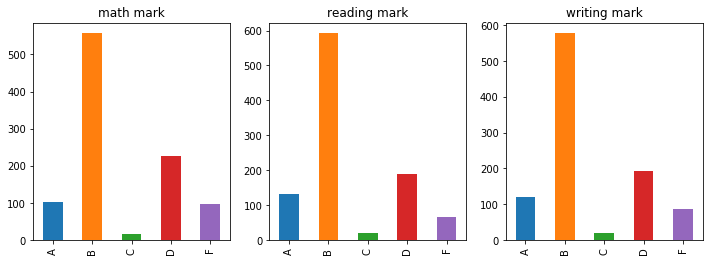

In [114]:
figure = plt.figure(figsize=(12,4))
j = 1
for i in ['math mark', 'reading mark', 'writing mark']:
    ax = figure.add_subplot(1, 3, j)
    ax.set_title(i)
    students_performance[i].value_counts().sort_index().plot(kind="bar")
    j = j + 1

In [115]:
def boxpl(dt, x_cols, y_cols):
    j = 1
    x_cnt = len(x_cols)
    y_cnt = len(y_cols)
    figure = plt.figure(figsize=(17, 5 * x_cnt))
    for x_ax in x_cols:
        for i in y_cols:
            ax = figure.add_subplot(x_cnt, y_cnt, j)
            #ax.set_title(i)
            k = sns.boxplot(x = dt[x_ax], y = dt[i])
            k.set_xticklabels(k.get_xticklabels(), rotation=20)
            j = j + 1

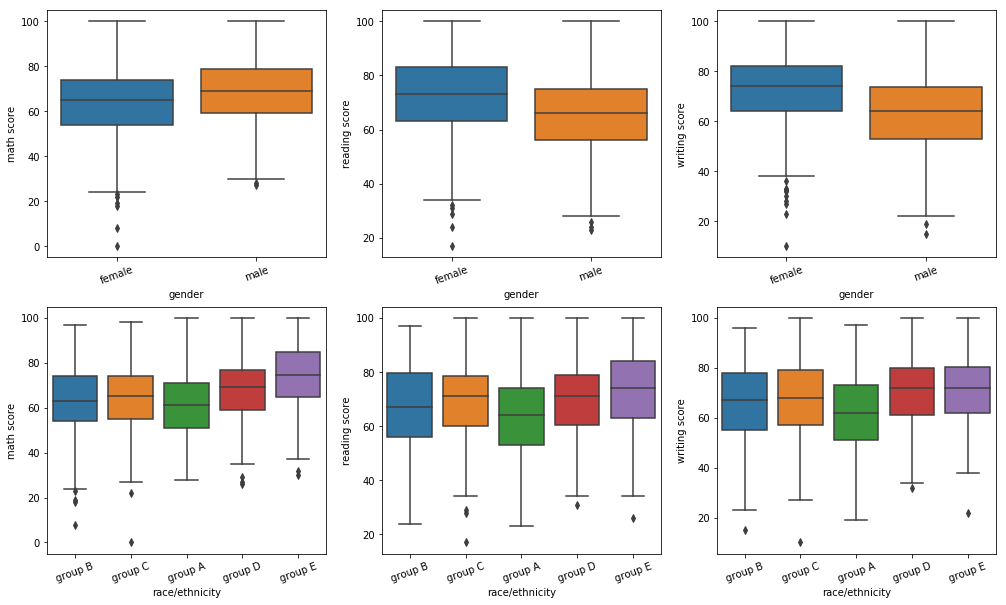

In [116]:
#Check exam score quartiles allocation for gender and race
y_cols = ['math score', 'reading score', 'writing score']
x_cols = ['gender', 'race/ethnicity']
boxpl(students_performance, x_cols, y_cols)

In [117]:
#Predicting student exam failures with Classification methods

#Import libraries from sklearn for prediction of student exam failures with Classification model
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [118]:
#We are defining function that takes a grade mark and returns the number of students 
#that have the given grade for each exam.
def getMarkData(dt, marks):
    subDt = dt[(dt['math mark'].isin(marks)) | (dt['reading mark'].isin(marks)) | (dt['writing mark'].isin(marks))]
    return subDt
    
def MarkCounts(dt, marks):
    subDt = getMarkData(dt, marks)
    print('Math: ' + str(subDt[subDt['math mark'].isin(marks)].shape[0])
      , '\n'
      , 'Writing: ' + str(subDt[subDt['writing mark'].isin(marks)].shape[0])
      , '\n'
      , 'Reading: ' + str(subDt[subDt['reading mark'].isin(marks)].shape[0])
      , '\n'
      , '\n'
      , 'Math and Reading: ' + str(subDt[(subDt['math mark'].isin(marks)) & (subDt['reading mark'].isin(marks))].shape[0])
      , '\n'
      , 'Math and Writing: ' + str(subDt[(subDt['math mark'].isin(marks)) & (subDt['writing mark'].isin(marks))].shape[0])
      , '\n'
      ,'Reading and Writing: ' + str(subDt[(subDt['reading mark'].isin(marks)) & (subDt['writing mark'].isin(marks))].shape[0])
      , '\n'
      , '\n',
      'All: '+str(subDt[(subDt['math mark'].isin(marks))&(subDt['reading mark'].isin(marks))&(subDt['writing mark'].isin(marks))].shape[0])
     )

In [119]:
#The additional column representing the pass or failure classes, depending on where the performance 
#belongs to.
def hasFailed(dt):
    if ((dt['math mark'] == 'F') | (dt['reading mark'] == 'F') | (dt['writing mark'] == 'F')):
        return 1
    else:
        return 0
students_performance['failed'] = students_performance.apply(hasFailed, axis=1)

In [120]:
#Add one hot encoding: transform textual variables into binaries
classification = students_performance[[
                              'gender'
                            , 'race/ethnicity'
                            , 'parental level of education'
                            , 'lunch'
                            , 'test preparation course'
                            , 'failed'
                           ]]

In [121]:
students_performance.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math mark,reading mark,writing mark,failed
0,female,group B,bachelor's degree,standard,none,72,72,74,B,B,B,0
1,female,group C,some college,standard,completed,69,90,88,B,A,A,0
2,female,group B,master's degree,standard,none,90,95,93,A,A,A,0
3,male,group A,associate's degree,free/reduced,none,47,57,44,D,D,F,1
4,male,group C,some college,standard,none,76,78,75,B,B,B,0


In [133]:
#Splitting new dataset into X and Y variables
y = students_performance.failed
y.head()

0    0
1    0
2    0
3    1
4    0
Name: failed, dtype: int64

In [134]:
X = students_performance.drop(['failed'], axis=1)
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math mark,reading mark,writing mark
0,female,group B,bachelor's degree,standard,none,72,72,74,B,B,B
1,female,group C,some college,standard,completed,69,90,88,B,A,A
2,female,group B,master's degree,standard,none,90,95,93,A,A,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,D,D,F
4,male,group C,some college,standard,none,76,78,75,B,B,B


In [135]:
X = pd.get_dummies(X)
X.head()

,math score,reading score,writing score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,...,reading mark_A,reading mark_B,reading mark_C,reading mark_D,reading mark_F,writing mark_A,writing mark_B,writing mark_C,writing mark_D,writing mark_F
0,72,72,74,1,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,69,90,88,1,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
2,90,95,93,1,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,47,57,44,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,76,78,75,0,1,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0


In [136]:
#Trying to perform 80/20 Data Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [137]:
#Checking the dimension of our data
X_train.shape, y_train.shape

((800, 35), (800,))

In [138]:
X_test.shape, y_test.shape

((200, 35), (200,))

In [140]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [141]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [178]:
#The final step is to make predictions on our test data.
y_pred = classifier.predict(X_test)
y_pred.shape

(200,)

In [175]:
from sklearn.metrics import classification_report, confusion_matrix
#confusion_matrix(y_test, y_pred)
prediction = classification_report(y_test, y_pred)
prediction

'              precision    recall  f1-score   support\n\n           0       0.98      1.00      0.99       168\n           1       1.00      0.91      0.95        32\n\n    accuracy                           0.98       200\n   macro avg       0.99      0.95      0.97       200\nweighted avg       0.99      0.98      0.98       200\n'

In [159]:
#DecisionTree_model = DecisionTreeClassifier(criterion = "entropy", random_state = 999).fit(train_X, train_Y)
error = []

# Calculating error for K values between 1 and 200
for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0,0.5,'Mean Error')

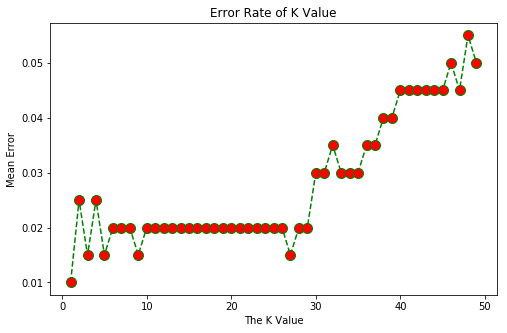

In [170]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 50), error, color='green', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate of K Value')
plt.xlabel('The K Value')
plt.ylabel('Mean Error')

In [163]:
print

In [179]:
dt = DecisionTreeClassifier(criterion = "entropy", random_state = 999).fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=999)

In [164]:
Decision_Tree = accuracy_score(y_test, dt.predict(X_test))

In [167]:
print('\n decision tree is', Decision_Tree)


 decision tree is 1.0
